In [32]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline
import numpy
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import preprocessing

df = pd.read_csv("master.csv")

In [33]:
del df['suicides_no']
del df['country-year']
del df['HDI for year']
del df['generation']
del df['population']
del df['sex']
del df['country']
del df['year']
del df[' gdp_for_year ($) ']
del df['gdp_per_capita ($)']
age_groups = {'5-14 years':0, '15-24 years':1, '25-34 years':2, '35-54 years':3, '55-74 years':4, '75+ years':5}
df = df.replace({'age': age_groups})

In [34]:
age = df.loc[:, 'age']
suicides = df.loc[:, 'suicides/100k pop']

<AxesSubplot:xlabel='Age', ylabel='Suicides/100k pop'>

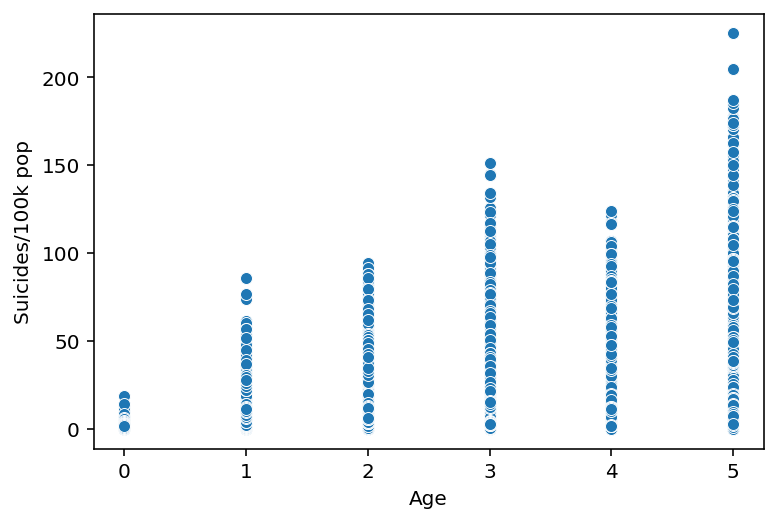

In [35]:
df = pd.DataFrame({"Age":age, "Suicides/100k pop":suicides})
sbn.scatterplot(x = "Age", y = "Suicides/100k pop", data=df)

<AxesSubplot:xlabel='Age', ylabel='Suicides/100k pop'>

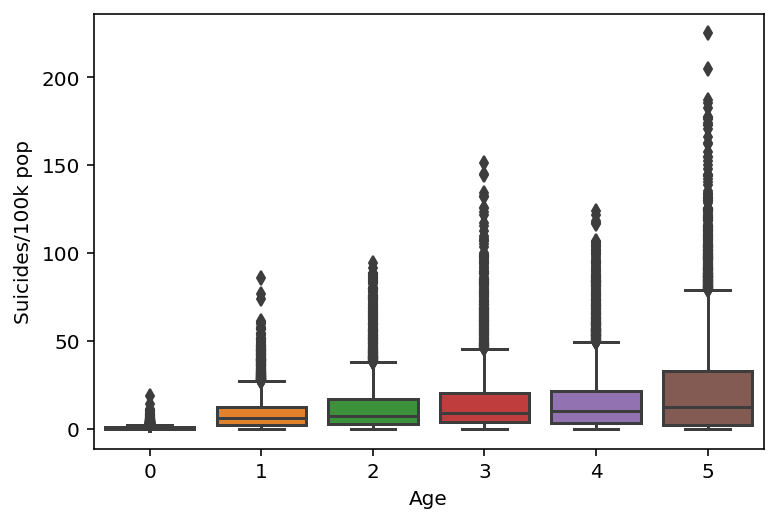

In [36]:
sbn.boxplot(x = "Age", y = "Suicides/100k pop", data=df)

In [37]:
group5 = df[df.Age == 5]
group5 = group5[group5['Suicides/100k pop'] <= 53]
group4 = df[df.Age == 4]
group4 = group4[group4['Suicides/100k pop'] <= 34]
group3 = df[df.Age == 3]
group3 = group3[group3['Suicides/100k pop'] <= 31]
group2 = df[df.Age == 2]
group2 = group2[group2['Suicides/100k pop'] <= 26]
group1 = df[df.Age == 1]
group1 = group1[group1['Suicides/100k pop'] <= 18]
group0 = df[df.Age == 0]
group0 = group0[group0['Suicides/100k pop'] <= 2]


In [51]:
newdf=[group5,group4,group3,group2,group1,group0]
newdf = pd.concat(newdf)

In [52]:
newdf

,Age,Suicides/100k pop
3,5,4.59
5,5,2.81
12,5,5.49
14,5,4.48
24,5,8.89
...,...,...
27780,0,1.66
27783,0,1.08
27795,0,0.62
27807,0,1.19


<AxesSubplot:xlabel='Age', ylabel='Suicides/100k pop'>

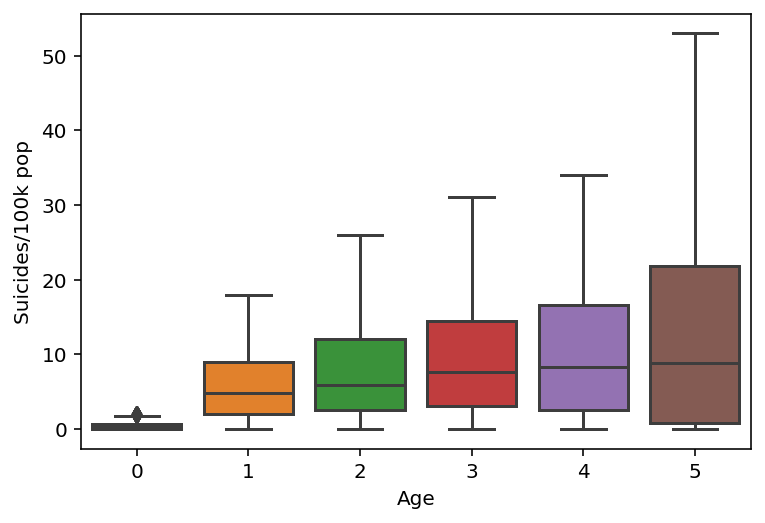

In [53]:
sbn.boxplot(x = "Age", y = "Suicides/100k pop", data=newdf)

<AxesSubplot:xlabel='Age', ylabel='Suicides/100k pop'>

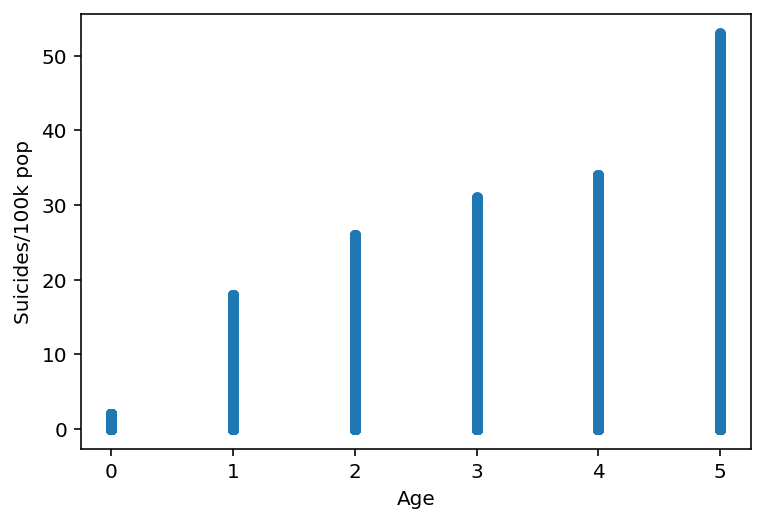

In [55]:
newdf.plot(kind='scatter',x='Age',y='Suicides/100k pop')

In [56]:
df = newdf

Y = df.iloc[:, -1:].values
X = df.iloc[:, 0].values

X = X.reshape(-1,1)
Y = Y.reshape(-1)

print(X)
print(Y)

[[5]
 [5]
 [5]
 ...
 [0]
 [0]
 [0]]
[4.59 2.81 5.49 ... 0.62 1.19 1.67]


In [57]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, Y, test_size = 1/3, random_state = 1)
print(X_Train.shape, X_Test.shape, y_Train.shape, y_Test.shape)

# Fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

model=regressor.fit(X_Train, y_Train) # FITTING MEANS TRAINING

# Predicting the Test set result ￼

Y_Pred = model.predict(X_Test)

(16266, 1) (8133, 1) (16266,) (8133,)


In [58]:
print(model.coef_)
print(model.intercept_)

[2.27501745]
2.1913892296161634


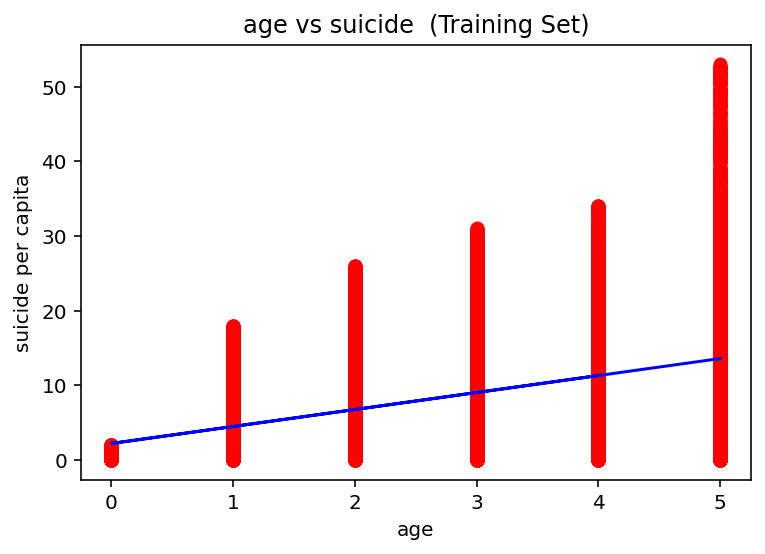

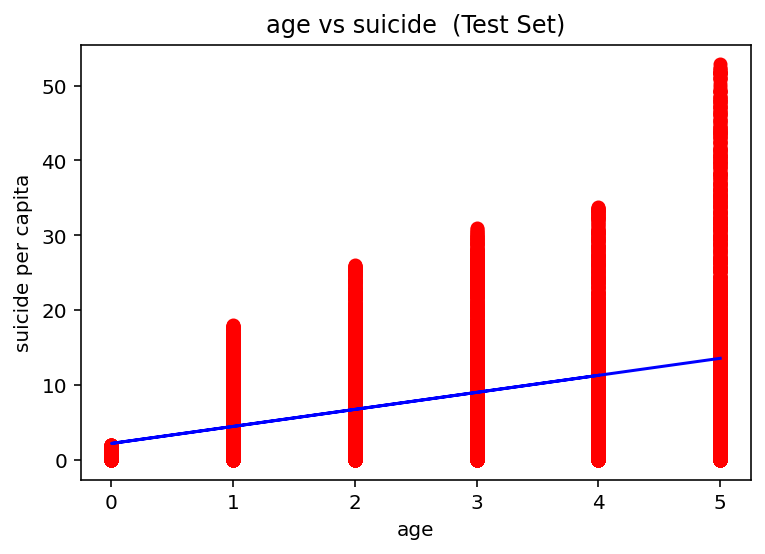

In [59]:
# Visualising the Training set results

plt.scatter(X_Train, y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('age vs suicide  (Training Set)')
plt.xlabel('age')
plt.ylabel('suicide per capita')
plt.show()

# Visualising the Test set results

plt.scatter(X_Test, y_Test, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('age vs suicide  (Test Set)')
plt.xlabel('age')
plt.ylabel('suicide per capita')
plt.show()

In [60]:
model.score(X, Y)

0.18361090490386134

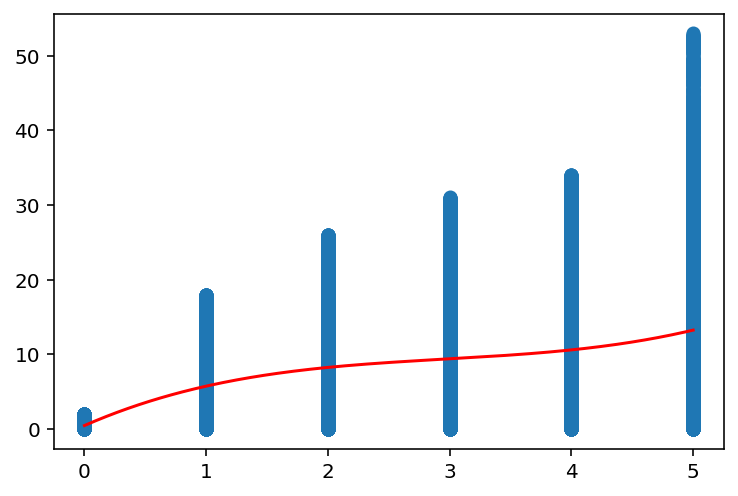

In [66]:
x = df['Age']
y = df['Suicides/100k pop']

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(0,5,225)

plt.scatter(x,y)
plt.plot(myline, mymodel(myline), color='red')
plt.show()

In [67]:
from sklearn.metrics import r2_score
print(r2_score(y, mymodel(x)))

0.19894267217733141
